<a href="https://colab.research.google.com/github/DeepMalviya1/Adult-Salary/blob/main/Adult_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import basic libraries, data and observe data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('https://github.com/ybifoundation/Dataset/blob/main/Adult%20Salary.csv?raw=true')

In [3]:
data.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe(include = 'all')

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
count,48842.000000,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,NaN,2,9,16,7,15,6,5,42,2
top,NaN,Male,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,United-States,<=50K
freq,NaN,32650,33906,15784,22379,6172,19716,41762,43832,37155
mean,38.643585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.710510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

#Preprocessing

In [7]:
cat = [i for i in data.columns if data[i].dtype == "O"]
cat

['Gender',
 'WorkingClass',
 'Education',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'NativeCountry',
 'Income']

In [8]:
for features in cat:
  print(data[features].value_counts())
  print("\n \n")

Male      32650
Female    16192
Name: Gender, dtype: int64

 

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: WorkingClass, dtype: int64

 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: Education, dtype: int64

 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: MaritalStatus, dtype: int64

 

Prof-specialty       6172

In [9]:
print(f"WorkingClass: {round(2799/48842, 5) *100 } %")
print(f"Occupation: {round(2809/48842, 4) *100 } %")
print(f"NativeCountry: {round(857/48842, 5) *100 } %")

WorkingClass: 5.731 %
Occupation: 5.75 %
NativeCountry: 1.755 %


In [10]:
data["WorkingClass"] = data["WorkingClass"].str.replace('?','Private')
data["Occupation"] = data["Occupation"].str.replace('?','Prof-specialty')
data["NativeCountry" ]= data["NativeCountry"].str.replace('?','United-States')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
data['Education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school',inplace = True, regex = True)
data['Education'].replace(['Doctorate','Prof-school','Assoc-acdm','Assoc-voc','Masters','Bachelors','Some-college','HS-grad'],'higher', inplace = True, regex = True)

In [12]:
data['MaritalStatus'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',inplace = True, regex = True)
data['MaritalStatus'].replace(['Divorced','Separated','Widowed','Married-spouse-absent',],'Other',inplace = True, regex = True)

In [13]:
data['Income'] = data['Income'].replace({"<=50K": 0, ">50K" : 1 }, regex = True)

In [14]:
data

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,school,Never-married,Machine-op-inspct,Own-child,Black,United-States,0
1,38,Male,Private,higher,Married,Farming-fishing,Husband,White,United-States,0
2,28,Male,Local-gov,higher,Married,Protective-serv,Husband,White,United-States,1
3,44,Male,Private,higher,Married,Machine-op-inspct,Husband,Black,United-States,1
4,18,Female,Private,higher,Never-married,Prof-specialty,Own-child,White,United-States,0
...,...,...,...,...,...,...,...,...,...,...
48837,27,Female,Private,higher,Married,Tech-support,Wife,White,United-States,0
48838,40,Male,Private,higher,Married,Machine-op-inspct,Husband,White,United-States,1
48839,58,Female,Private,higher,Other,Adm-clerical,Unmarried,White,United-States,0
48840,22,Male,Private,higher,Never-married,Adm-clerical,Own-child,White,United-States,0


In [15]:
from sklearn.preprocessing import LabelEncoder
df = data.apply(LabelEncoder().fit_transform)

In [16]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,8,1,3,1,1,6,3,2,38,0
1,21,1,3,0,0,4,0,4,38,0
2,11,1,1,0,0,10,0,4,38,1
3,27,1,3,0,0,6,0,2,38,1
4,1,0,3,0,1,9,3,4,38,0


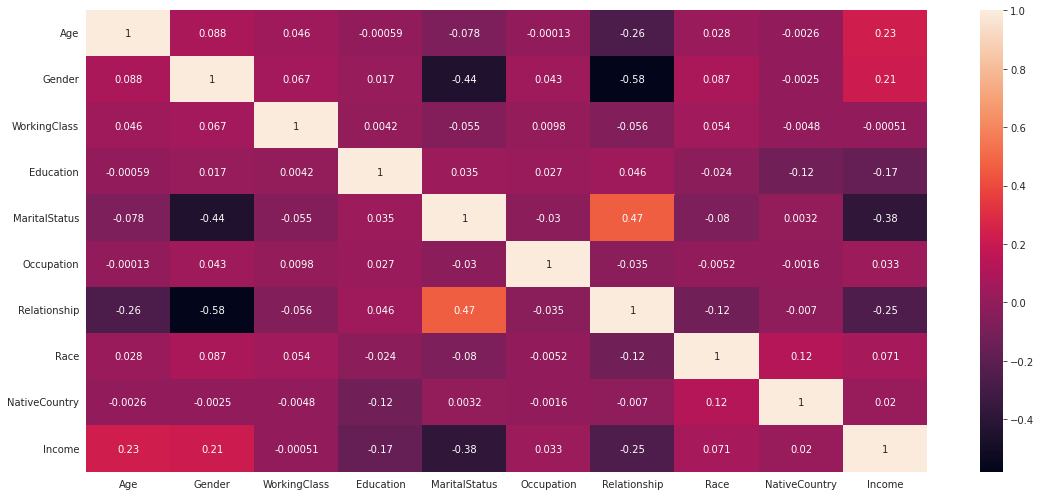

In [17]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr,annot = True)
plt.tight_layout()

In [18]:
df.columns

Index(['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry', 'Income'],
      dtype='object')

# Data Splitting and Scaling

In [19]:
X = df[['Age', 'Gender', 'WorkingClass', 'Education', 'MaritalStatus',
       'Occupation', 'Relationship', 'Race', 'NativeCountry']]
       
y = df['Income']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2529)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9768, 9), (39074, 9), (9768,), (39074,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#Modelling

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred = lr.predict(X_test)

In [30]:
pred

array([0, 0, 0, ..., 0, 0, 0])

#Results

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
cm = confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     29738
           1       0.55      0.36      0.43      9336

    accuracy                           0.78     39074
   macro avg       0.68      0.63      0.65     39074
weighted avg       0.75      0.78      0.76     39074

[[26994  2744]
 [ 6003  3333]]


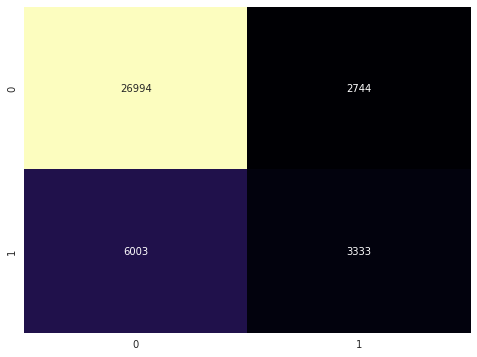

In [32]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True, cmap = 'magma',cbar = False, fmt = 'g')